1.Write a program to perform the Huffman coding techniques on an image and compute Compression Ratio.

2.Take an image, apply Fourier transformation, quantize data and apply Huffman coding. Apply Huffman decoding and inverse Fourier to obtain reconstructed image. Calculate  CR and PSNR
Note: use different quantization and analyze reconstructed image quality.

In [5]:
import numpy as np
from PIL import Image
import heapq
from collections import defaultdict
import os

# Node class for Huffman tree
class Node:
    def __init__(self, value, frequency):
        self.value = value
        self.frequency = frequency
        self.left = None
        self.right = None

    # Defining comparison operators for the priority queue
    def __lt__(self, other):
        return self.frequency < other.frequency

def calculate_frequencies(image):
    """ Calculate frequency of each pixel value in the image """
    freq = defaultdict(int)
    for pixel in image.flatten():
        freq[pixel] += 1
    return freq

def build_huffman_tree(frequencies):
    """ Build the Huffman tree from pixel frequencies """
    heap = [Node(value, freq) for value, freq in frequencies.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
    return heap[0]

def generate_huffman_codes(node, prefix='', codebook={}):
    """ Generate Huffman codes for each pixel value """
    if node is not None:
        if node.value is not None:
            codebook[node.value] = prefix
        generate_huffman_codes(node.left, prefix + '0', codebook)
        generate_huffman_codes(node.right, prefix + '1', codebook)
    return codebook

def encode_image(image, codebook):
    """ Encode the image using the Huffman codes """
    encoded_image = ''.join([codebook[pixel] for pixel in image.flatten()])
    return encoded_image

def calculate_compression_ratio(original_size, encoded_size):
    """ Calculate the compression ratio """
    return original_size / encoded_size

# Load and preprocess the image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.tiff"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_data = np.array(image)

# Calculate pixel frequencies
frequencies = calculate_frequencies(image_data)

# Build Huffman tree and generate codes
huffman_tree = build_huffman_tree(frequencies)
huffman_codes = generate_huffman_codes(huffman_tree)

# Encode the image
encoded_image = encode_image(image_data, huffman_codes)

# Calculate sizes and compression ratio
original_size = os.path.getsize(image_path) * 8  # size in bits
encoded_size = len(encoded_image)  # size in bits
compression_ratio = calculate_compression_ratio(original_size, encoded_size)

print(f'Original Size: {original_size} bits')
print(f'Encoded Size: {encoded_size} bits')
print(f'Compression Ratio: {compression_ratio:.2f}')



Original Size: 59568 bits
Encoded Size: 293698 bits
Compression Ratio: 0.20


Original Size: 59568 bits
Encoded Size: 331205 bits
Compression Ratio: 0.18
PSNR: 80.24 dB


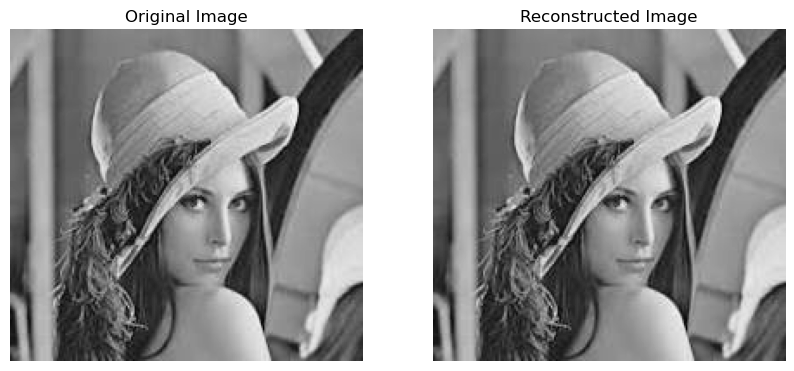

In [10]:
import numpy as np
from PIL import Image
import heapq
from collections import defaultdict
import os
import matplotlib.pyplot as plt

# Huffman Node class
class Node:
    def __init__(self, value, frequency):
        self.value = value
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

# Functions for Huffman coding
def calculate_frequencies(data):
    freq = defaultdict(int)
    for value in data:
        freq[value] += 1
    return freq

def build_huffman_tree(frequencies):
    heap = [Node(value, freq) for value, freq in frequencies.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
    return heap[0]

def generate_huffman_codes(node, prefix='', codebook={}):
    if node is not None:
        if node.value is not None:
            codebook[node.value] = prefix
        generate_huffman_codes(node.left, prefix + '0', codebook)
        generate_huffman_codes(node.right, prefix + '1', codebook)
    return codebook

def encode_data(data, codebook):
    encoded_data = ''.join([codebook[value] for value in data])
    return encoded_data

def decode_data(encoded_data, huffman_tree):
    decoded_data = []
    current_node = huffman_tree
    for bit in encoded_data:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right
        if current_node.value is not None:
            decoded_data.append(current_node.value)
            current_node = huffman_tree
    return np.array(decoded_data)

def quantize(data, num_levels):
    quantized_data = np.round(data * (num_levels - 1))
    return quantized_data.astype(int)

def inverse_quantize(data, num_levels):
    inverse_quantized_data = data / (num_levels - 1)
    return inverse_quantized_data

def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load and preprocess the image
image_path = r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.tiff"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_data = np.array(image) / 255.0  # Normalize to [0, 1]

# Apply Fourier transformation
fourier_transformed = np.fft.fft2(image_data)
fourier_transformed_shifted = np.fft.fftshift(fourier_transformed)
magnitude_spectrum = np.abs(fourier_transformed_shifted)

# Quantize the Fourier-transformed data
num_levels = 16  # Change this for different quantization levels
quantized_data = quantize(magnitude_spectrum, num_levels)

# Flatten the quantized data for Huffman coding
flat_quantized_data = quantized_data.flatten()

# Calculate frequencies and build Huffman tree
frequencies = calculate_frequencies(flat_quantized_data)
huffman_tree = build_huffman_tree(frequencies)
huffman_codes = generate_huffman_codes(huffman_tree)

# Encode the quantized data
encoded_data = encode_data(flat_quantized_data, huffman_codes)

# Decode the Huffman-coded data
decoded_data = decode_data(encoded_data, huffman_tree)
decoded_data = decoded_data.reshape(quantized_data.shape)

# Inverse quantize the decoded data
inverse_quantized_data = inverse_quantize(decoded_data, num_levels)

# Apply inverse Fourier transformation
inverse_fourier_transformed_shifted = inverse_quantized_data * np.exp(1j * np.angle(fourier_transformed_shifted))
inverse_fourier_transformed = np.fft.ifftshift(inverse_fourier_transformed_shifted)
reconstructed_image_data = np.abs(np.fft.ifft2(inverse_fourier_transformed))

# Calculate Compression Ratio (CR)
original_size = os.path.getsize(image_path) * 8  # size in bits
encoded_size = len(encoded_data)  # size in bits
compression_ratio = original_size / encoded_size

# Calculate PSNR
psnr = calculate_psnr(image_data, reconstructed_image_data)

# Output results
print(f'Original Size: {original_size} bits')
print(f'Encoded Size: {encoded_size} bits')
print(f'Compression Ratio: {compression_ratio:.2f}')
print(f'PSNR: {psnr:.2f} dB')

# Display the original and reconstructed images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_data, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image_data, cmap='gray')
plt.axis('off')

plt.show()
